<a href="https://colab.research.google.com/github/NicoEssi/Machine_Learning_scikit-learn/blob/master/Random_Forest_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression - Demo


---

Utilizies an ensemble of decision trees to make predictions, then averages the outputs of each decision tree to give a final output that is more accurate than an individual decision tree and gives some controls for overfitting.

## Pros

*   Powerful and accurate results
*   Good performance on linear- & non-linear problems

## Cons

*   No interpretability
*   Easily overfits
*   Need to choose arbitrary number of decision trees

---

## 1. Import dependencies and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget https://github.com/NicoEssi/Machine_Learning_scikit-learn/raw/master/Position_Salaries.csv

--2019-08-23 21:24:10--  https://github.com/NicoEssi/Machine_Learning_scikit-learn/raw/master/Position_Salaries.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NicoEssi/Machine_Learning_scikit-learn/master/Position_Salaries.csv [following]
--2019-08-23 21:24:10--  https://raw.githubusercontent.com/NicoEssi/Machine_Learning_scikit-learn/master/Position_Salaries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246 [text/plain]
Saving to: ‘Position_Salaries.csv’

Position_Salaries.c 100%[===================>]     246  --.-KB/s    in 0s      

2019-08-23 21:24:10 (37.0 MB/s) - ‘Position_Salaries.c

## 2. Read CSV and inspect

In [2]:
data = pd.read_csv('Position_Salaries.csv')

X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## 3. Initialize and fit Random Forest model

In [3]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 337)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=337,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## 4. Predict with the trained model

In [4]:
y_pred = regressor.predict(np.array([[6.5]]))

y_pred

array([158694.3620178])

## 5. Visualization

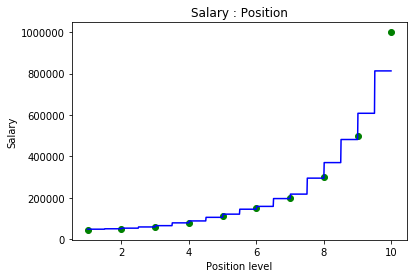

In [5]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Salary : Position')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()